## Question 1

In [1]:
import matplotlib.pyplot as plt
import math
import statistics as st
import numpy as np
import scipy.linalg as la
from datetime import datetime
import sympy as sym

In [2]:
def myawgn(PSD,B,Fs,l):
    sigma = math.sqrt(2*PSD*B)
    #sigma is the standard deviation
    print("Power = ",2*PSD*B)
    
    N = 1000   
    x = sigma*(np.random.randn(N,l))
    awgn_sequence = x[0]
    
    y = abs(np.fft.fft(x))
    y_conjugate = np.conjugate(y)
    y_squared = np.multiply(y,y_conjugate)
    y_mean = np.mean(y_squared,axis = 1)
    y_mean = y_mean/(Fs*l);
    calculated_psd = np.mean(y_mean);
    
    print("Calculated PSD = ",calculated_psd)
    
    #plotting
    plt.figure()
    plt.plot(y_mean, color = 'green', label='Mean using sample functions')
    plt.axhline(y=calculated_psd, color='r', linestyle='-', label = 'Calculated PSD')
    plt.axhline(y=PSD, color='blue', linestyle='dotted', label = 'Given PSD')
    plt.legend()
    plt.show
    
    return awgn_sequence

PSD: 500
Bandwidth: 100
Sampling frequency: 200
Length of the sequence: 1000
Power =  100000.0
Calculated PSD =  499.3811349927447
AWGN sequence:  [-1.55814138e+02 -1.37948701e+02 -1.41423447e+02  8.28587016e+01
  2.84716693e+02 -4.98318389e+02  5.73058599e+01 -1.86142323e+02
  4.58733679e+02  2.98283252e+02  3.95816528e+01  1.75622846e+02
  2.89468733e+02  5.34809941e+02  6.97167366e+02 -4.72908065e+01
 -9.49388289e+01  3.11886151e+02 -1.11573522e+02 -1.45286119e+01
  1.79392484e+02  2.21146821e+01 -6.93450570e+02 -2.69487452e+02
  3.13639744e+02  3.28523501e+02 -6.18415472e+00 -1.83085154e+02
  1.94635943e+02  3.64268599e+02  6.13287799e+02  2.97197751e+02
  2.15751750e+02  3.90333734e+02 -5.09296792e+01 -2.92271806e+02
  1.53435206e+02  3.71819955e+02  1.25401670e+02  7.69004628e+01
 -3.16154095e+02 -3.41127666e+02  1.61404918e+02  3.98190396e+02
 -9.10391826e+01  2.37560200e+02 -8.33455221e+01 -1.49011030e+01
 -4.86888100e+01 -1.56423056e+02  1.55720269e+02  3.58618787e+02
  4.0042

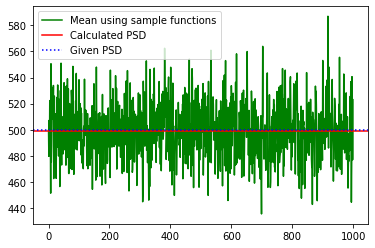

In [3]:
PSD = float(input('PSD: '))
B = float(input('Bandwidth: '))
Fs = float(input('Sampling frequency: '))
l = int(input('Length of the sequence: '))
awgn = myawgn(PSD,B,Fs,l)
print("AWGN sequence: ",awgn)

## Question 2

In [4]:
# library function to check PSD
def posSymDef(mat):
    return np.all(np.linalg.eigvals(mat) > 0)

def mygauss(mu,cov,s):
    
    eigval,m1 = la.eig(cov);    
    m1 = np.array(m1).astype(float);
    m1_inv = np.linalg.inv(m1);
    m2 = np.matmul(m1_inv,cov);
    m2 = np.matmul(m2,m1);
    
    for i in range(len(m2)):
        m2[i][i] = np.sqrt(m2[i][i]);

    M = np.matmul(m1,m2);
    M = np.matmul(M,m1_inv);
    ans = np.matmul(np.random.randn(s, len(m2)),M);
    
    for i in range(s):
        ans[i] = ans[i] + mu;
    print('\nSamples:');
    print(ans);
    
    print('\nCalculated Mean Vector:');
    mu = [];
    ans = np.transpose(ans);
    for i in range(len(m2)): 
        mu.append(np.mean(ans[i]));
    print(mu);
    
    print('\nCalculated Covariance Matrix:');
    print(np.cov(ans));
    print('\nCalculated matrix SPD?: '+str(posSymDef(cov)));

In [5]:
cov = np.array([[2, -1, 0],
                [-1, 2, -1],
                [0, -1, 2]]);
mu = np.array([1,3,-5]);

print('Entered Mean Vector:');
print(mu);
print('\nEntered Covariance Matrix:');
print(cov);

mygauss(mu,cov,10000);

Entered Mean Vector:
[ 1  3 -5]

Entered Covariance Matrix:
[[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]

Samples:
[[ 1.07126392  1.57325674 -1.99812429]
 [ 1.8310989   2.95882931 -5.24555917]
 [ 0.24695964  1.16748971 -4.66019658]
 ...
 [ 1.80900553  6.01039805 -6.02386182]
 [ 3.8905174   0.82114425 -6.22760604]
 [ 1.70671262  5.53382482 -9.03190338]]

Calculated Mean Vector:
[1.0353198096946992, 2.953741212848046, -4.984730914314471]

Calculated Covariance Matrix:
[[ 2.0194349  -1.02033005  0.01733812]
 [-1.02033005  2.0414831  -1.02638963]
 [ 0.01733812 -1.02638963  2.01643282]]

Calculated matrix SPD?: True
